# Import Package


In [1]:
# basic python package
import importlib
import numpy as np

# python ploting packages
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm


# self-define classes
from script import CR_ML_Class as CR

# tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
print("Tensorflow Version is {}".format(tf.__version__))
print("Keras Version is {}".format(tf.keras.__version__))



Tensorflow Version is 2.4.1
Keras Version is 2.4.0


In [5]:
%%time
importlib.reload(CR)

mock_data_path = "../Data/Numpy_mock_data/"

para_0_0 = np.load(mock_data_path + "parameter_0.npy")
para_0_1 = np.load(mock_data_path + "new_parameter_0.npy")
origin_data_0 = np.load(mock_data_path + "data_0.npy")
mock_0 = CR.Mock_Data_Rescale(para_0_0, para_0_1, origin_data_0)
print("There are {} data ".format(len(mock_0.new_parameter)))
chi_0 = np.load(mock_data_path + "new_chi_0.npy")


parameter_0 = mock_0.new_parameter
data_0 = mock_0.data
chi_0 = chi_0


para_1_0 = np.load(mock_data_path + "parameter_1.npy")
para_1_1 = np.load(mock_data_path + "new_parameter_1.npy")
origin_data_1 = np.load(mock_data_path + "data_1.npy")
mock_1 = CR.Mock_Data_Rescale(para_1_0, para_1_1, origin_data_1)
chi_1 = np.load(mock_data_path + "new_chi_1.npy")

parameter_2_0 =  np.load(mock_data_path + "parameter_2.npy")
parameter_2_1 = np.load(mock_data_path + "new_parameter_2.npy")
origin_data_2 = np.load(mock_data_path + "data_2.npy")
mock_2 = CR.Mock_Data_Rescale(parameter_2_0, parameter_2_1, origin_data_2)
chi_2 = np.load(mock_data_path + "new_chi_2.npy")


parameter_3_0 =  np.load(mock_data_path + "parameter_3.npy")
parameter_3_1 = np.load(mock_data_path + "new_parameter_3.npy")
origin_data_3 = np.load(mock_data_path + "data_3.npy")
mock_3 = CR.Mock_Data_Rescale(parameter_3_0, parameter_3_1, origin_data_3)
chi_3 = np.load(mock_data_path + "new_chi_3.npy")

parameter_4_0 =  np.load(mock_data_path + "parameter_4.npy")
parameter_4_1 = np.load(mock_data_path + "new_parameter_4.npy")
origin_data_4 = np.load(mock_data_path + "data_4.npy")
mock_4 = CR.Mock_Data_Rescale(parameter_4_0, parameter_4_1, origin_data_4)
chi_4 = np.load(mock_data_path + "new_chi_4.npy")

parameter = np.concatenate((mock_0.new_parameter,mock_1.new_parameter))
data = np.concatenate((mock_0.data,mock_1.data))
chi = np.concatenate((chi_0,chi_1))

parameter = np.concatenate((parameter,mock_2.new_parameter))
data = np.concatenate((data,mock_2.data))
chi = np.concatenate((chi,chi_2))

parameter = np.concatenate((parameter,mock_3.new_parameter))
data = np.concatenate((data,mock_3.data))
chi = np.concatenate((chi,chi_3))

parameter = np.concatenate((parameter,mock_4.new_parameter))
data = np.concatenate((data,mock_4.data))
chi = np.concatenate((chi,chi_4))


# parameter = mock_4.new_parameter[:15000]
# data = mock_4.data[:15000]
# chi =chi_4[:15000]

chi_sort = np.argsort(chi)

print("minium chi:", min(chi))
print("There are {} data ".format(parameter.shape[0]))

There are 223365 data 
minium chi: 347.33360999999996
There are 374445 data 
CPU times: user 2.84 s, sys: 4.46 s, total: 7.3 s
Wall time: 7.31 s


# Split Initial Data into Different CL regions

In [6]:
%%time
importlib.reload(CR)
chi_para_0, chi_data_0, chi_sele_0 = parameter_0,data_0,chi_0 #mock_0.new_parameter[:], mock_0.data[:], chi_0[:]

para_1_sigma_0, data_1_sigma_0, _ =  CR.Select_Sample(chi_para_0, chi_data_0, chi_sele_0,1).Sample()
para_2_sigma_0, data_2_sigma_0, _ =  CR.Select_Sample(chi_para_0, chi_data_0, chi_sele_0,2).Sample()
para_3_sigma_0, data_3_sigma_0, _ =  CR.Select_Sample(chi_para_0, chi_data_0, chi_sele_0,3).Sample()
para_4_sigma_0, data_4_sigma_0, _ =  CR.Select_Sample(chi_para_0, chi_data_0, chi_sele_0,4).Sample()
para_5_sigma_0, data_5_sigma_0, _ =  CR.Select_Sample(chi_para_0, chi_data_0, chi_sele_0,5).Sample()
para_6_sigma_0, data_6_sigma_0, chi_6_sigma_0 =  CR.Select_Sample(chi_para_0, chi_data_0, chi_sele_0,6).Sample()

INFO:root:There are 141 data in the 1 σ region.
INFO:root:Time consumption : 0.0020 min
INFO:root:There are 486 data in the 2 σ region.
INFO:root:Time consumption : 0.0021 min
INFO:root:There are 1407 data in the 3 σ region.
INFO:root:Time consumption : 0.0022 min
INFO:root:There are 3646 data in the 4 σ region.
INFO:root:Time consumption : 0.0025 min
INFO:root:There are 7945 data in the 5 σ region.
INFO:root:Time consumption : 0.0032 min
INFO:root:There are 14752 data in the 6 σ region.
INFO:root:Time consumption : 0.0048 min


CPU times: user 996 ms, sys: 31.5 ms, total: 1.03 s
Wall time: 1.02 s


# Split Return Data into Different CL regions

In [7]:
%%time
importlib.reload(CR)
chi_para, chi_data, chi_sele = parameter,data,chi #mock_0.new_parameter[:], mock_0.data[:], chi_0[:]

para_1_sigma, data_1_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,1).Sample()
para_2_sigma, data_2_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,2).Sample()
para_3_sigma, data_3_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,3).Sample()
para_4_sigma, data_4_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,4).Sample()
para_5_sigma, data_5_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,5).Sample()
para_6_sigma, data_6_sigma, chi_6_sigma =  CR.Select_Sample(chi_para, chi_data, chi_sele,6).Sample()

INFO:root:There are 2226 data in the 1 σ region.
INFO:root:Time consumption : 0.0038 min
INFO:root:There are 6600 data in the 2 σ region.
INFO:root:Time consumption : 0.0045 min
INFO:root:There are 13970 data in the 3 σ region.
INFO:root:Time consumption : 0.0055 min
INFO:root:There are 24700 data in the 4 σ region.
INFO:root:Time consumption : 0.0074 min
INFO:root:There are 39055 data in the 5 σ region.
INFO:root:Time consumption : 0.0099 min
INFO:root:There are 57252 data in the 6 σ region.
INFO:root:Time consumption : 0.0136 min


CPU times: user 2.42 s, sys: 289 ms, total: 2.71 s
Wall time: 2.71 s


In [12]:
%%time
importlib.reload(CR)

pseudo_data_path = "../Data/Pseudodata/"

pseudoparameter_4 = np.load(pseudo_data_path + "normalfactor_15000_wo_noise_0729.npy")
pseudodata_4 = np.load(pseudo_data_path + "pseudo_15000_wo_noise_0729.npy")

# pseudoparameter_4 = np.load(data_path + "normalfactor_15000_w_noise_0729.npy")
# pseudodata_4 = np.load(data_path + "Pseudodata/pseudo_15000_w_noise_0729.npy")

pure_pseudoparameter = np.load(pseudo_data_path + "pseudo_para_6sigma.npy")
pure_pseudodata = np.load(pseudo_data_path + "pseudo_data_6sigma.npy")
chi_pseudo = CR.Calculate_Chi_Square(data=pure_pseudodata, usedata = True).chi_square()
chi_index_pseudo = np.argsort(chi_pseudo)

# chi = CCS.Calculate_Chi_Square(parameter,data)
# parameter = parameter_0[:15000]
# pseudodata = modify_data_0[:15000]
# # chi = chi_0[:15000]

# chi_index = np.argsort(chi_0[:15000])

mock_data_path = "../Data/Numpy_mock_data/"

para_4_0 = np.load(mock_data_path + "parameter_4.npy")
para_4_1 = np.load(mock_data_path + "new_parameter_4.npy")
origin_data_4 = np.load(mock_data_path + "data_4.npy")
# para_4_1[:,5] = np.load("../Numpy_mock_data/Ap_5_4.npy")*5
mock_4 = CR.Mock_Data_Rescale(para_4_0, para_4_1, origin_data_4)
chi_4 = np.load(mock_data_path + "new_chi_4.npy")
# chi_4 = CR.Calculate_Chi_Square(data=mock_4.data, usedata = True).chi_square()
chi_index = np.argsort(chi_4[:15000])


selected_data_path = "../Data/Selected_Data/"

inpack_1 = np.load(selected_data_path + "return4_wo_sele_1.npy")
tmp_1 = np.load(selected_data_path + "return4_wo_sele_2.npy")

inpack_2 = np.load(selected_data_path + "return4_w_sele_1.npy")
tmp_2 = np.load(selected_data_path + "return4_w_sele_2.npy")

chi_index_wo_noise = np.argsort(chi_4[:15000][inpack_1][tmp_1])
chi_index_w_noise = np.argsort(chi_4[15000:][inpack_2][tmp_2])#+15000



INFO:root:Wed Feb 09 09:15:21 2022
INFO:root:Fit the Spectrum.
INFO:root:=====START=====
INFO:root: Time Cost for this Step : 0.0614 min
INFO:root:=====Finish=====
INFO:root:Calculate Chi-Square.
INFO:root:=====START=====
INFO:root: Time Cost for this Step : 0.0047 min
INFO:root:=====Finish=====
INFO:root:

INFO:root: Total Time Consumption : 0.0663 min


CPU times: user 4.56 s, sys: 16.1 s, total: 20.7 s
Wall time: 4.58 s


In [14]:
%%time
pseudo_pure = CR.Mock_Data_Processing(pure_pseudoparameter, data = pure_pseudodata, usedata = True)
pseudo_pure.Train_Test_split(splitrate = 0, split = False)

input_pseudo_pure = pseudo_pure.input_train

INFO:root:Wed Feb 09 09:19:41 2022
INFO:root:Prepare Ratio
INFO:root:Wed Feb 09 09:19:41 2022
INFO:root:Whitening
INFO:root:=====START=====
INFO:root: Time Cost for this Step : 0.0093 min
INFO:root:=====Finish=====
INFO:root:Time Cost : 0.0094 min
INFO:root:random split traning sample and test sample, 10% for test
INFO:root:=====START=====
INFO:root: Time Cost for this Step : 0.0000 min
INFO:root:=====Finish=====
INFO:root:Shape for training Input: (57252, 8, 84)
INFO:root:Shape for  testing Input: (0, 8, 84)
INFO:root:Shape for training Target: (57252, 10)
INFO:root:Shape for  testing Target: (0, 10)
INFO:root:Time Cost : 0.0752 min


CPU times: user 4.27 s, sys: 262 ms, total: 4.53 s
Wall time: 4.52 s


In [15]:
%%time
model_wo_noise = load_model("../Model/CR_ML_without_noise_6sigma.h5")
model_w_noise = load_model("../Model/CR_ML_with_noise.h5")
# model = load_model("./Model_denoise_0/CR_ML_13.h5")
# prediction_pseudo = model.predict(input_pseudo)

# prediction_return_wo_noise = model_wo_noise.predict(input_return[:15000][inpack_1][tmp_1])
# prediction_return_w_noise = model_w_noise.predict(input_return[15000:][inpack_2][tmp_2])


prediction_return_wo_noise = model_wo_noise.predict(input_pseudo_pure)
prediction_return_w_noise = model_w_noise.predict(input_pseudo_pure)


importlib.reload(CR)
# pseudo_recovery = CR.Recovery(prediction_pseudo).para_recovery
return_recovery_wo_noise = CR.Recovery(prediction_return_wo_noise).para_recovery
return_recovery_w_noise = CR.Recovery(prediction_return_w_noise).para_recovery
# print(pseudo_recovery.shape)
print(return_recovery_wo_noise.shape)
print(return_recovery_w_noise.shape)

(57252, 10)
(57252, 10)
CPU times: user 6.71 s, sys: 2.44 s, total: 9.15 s
Wall time: 8.61 s


[46.0537  33.75382 15.70705 12.9676   6.61515  4.52514  0.33822  0.08077
  1.72887  0.       2.82676  1.3753   2.14021  0.44884  3.15865 15.59638
 37.75399]


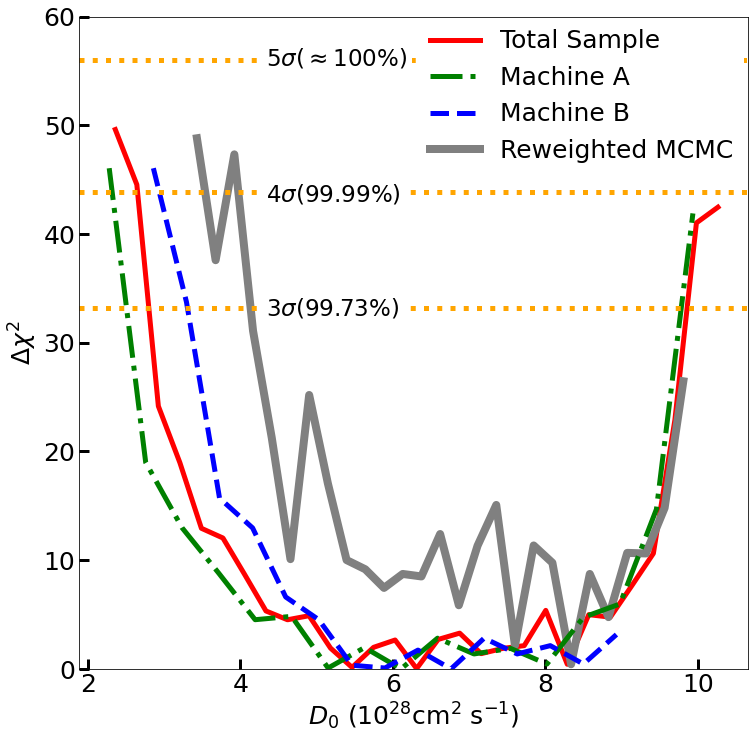

[53.12649 51.82859 29.7621  22.57618 12.54891  8.26254  4.29498  0.58277
  0.       0.08077  0.44884 13.12826 18.7892  16.21888 27.33386 37.30779
 55.97637]


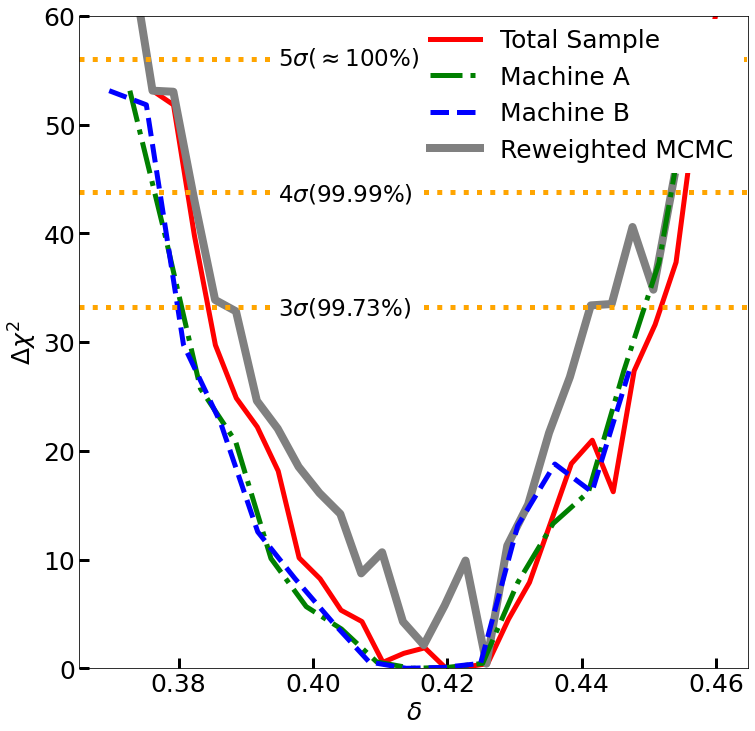

[33.75382 12.9676   5.98715  0.08077  1.72887  0.       2.82676  1.88909
  1.3753   5.71264  2.14021  3.15865  5.97316  0.44884 17.51561 41.47623
 60.28577]


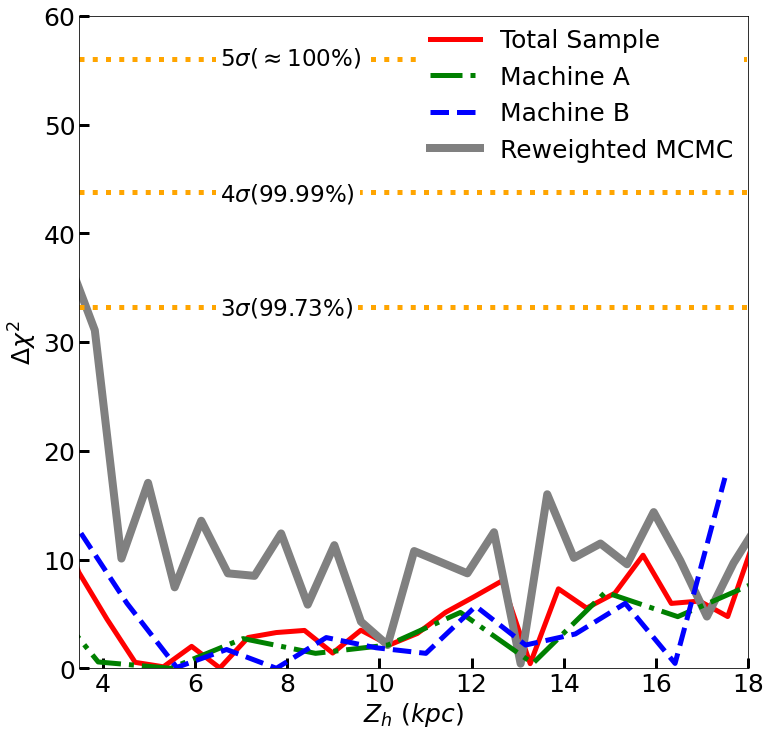

[62.67    48.79402 41.72721 28.53916 25.01252 20.04048  8.29933  7.11789
  0.44884  3.46291  0.       1.72887  0.58277  7.9877  16.48398 20.82545
 31.39516]


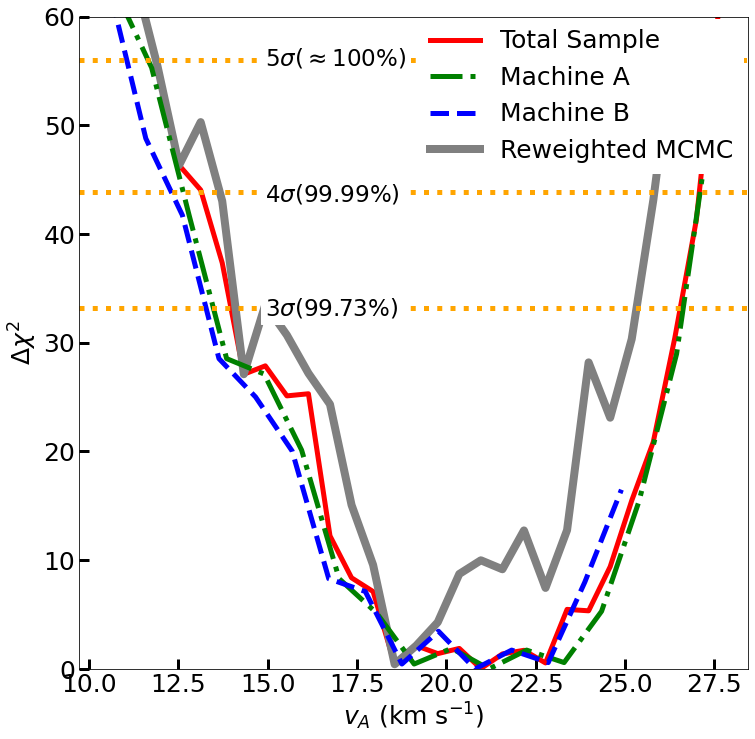

[60.28577 47.54065 41.39946 31.54796 20.10431 18.49496  8.24038  8.10802
  1.3753   0.       0.58277  2.45243  5.26101 14.74846 22.15812 35.55742
 51.42354]


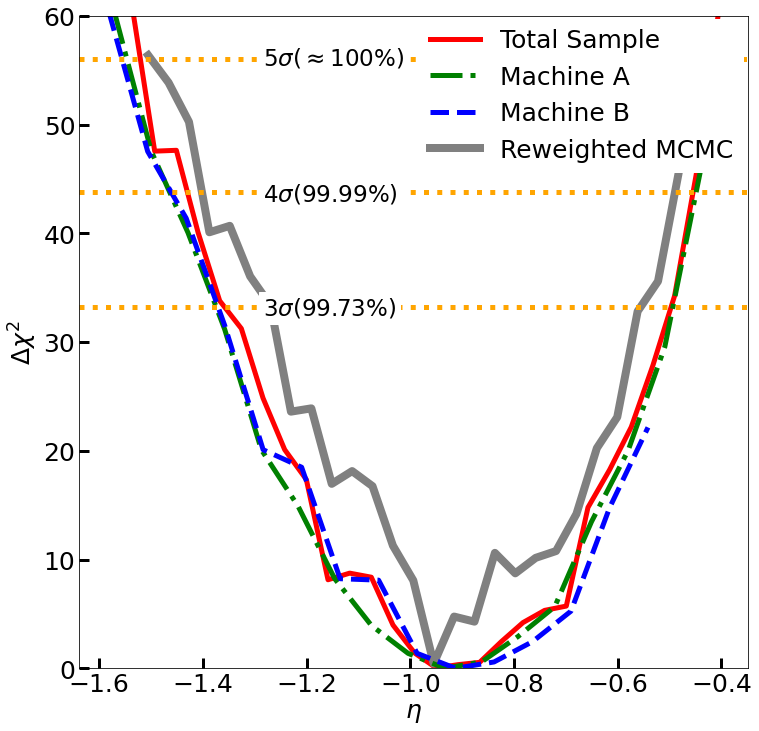

[ 0.33822  0.58277  0.       3.16393  3.95342  2.14021  7.4152  11.01514
  8.70645 17.10428 19.37693 22.11797 28.58649 34.40608 42.46413 55.45357
 58.46762]


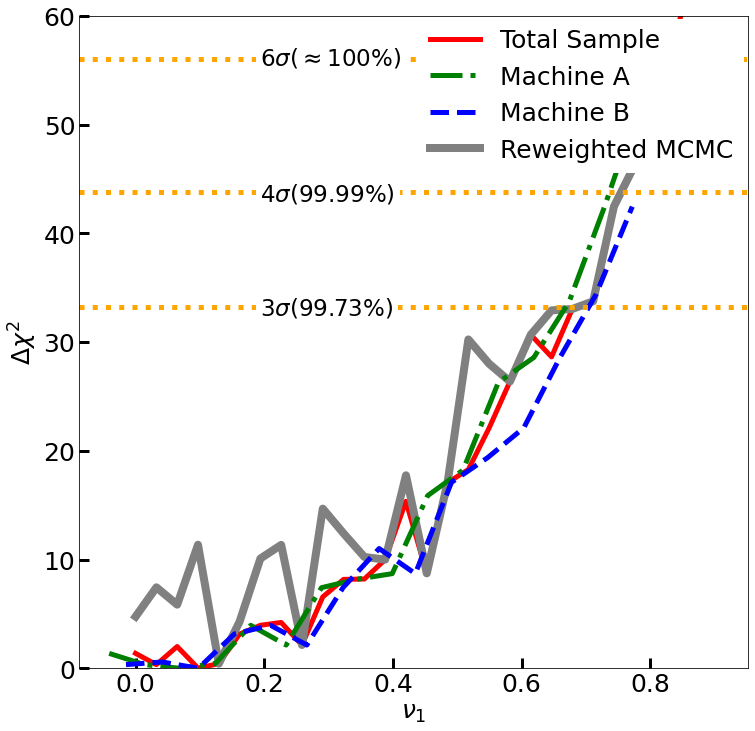

[62.42103 47.78998 32.85586 17.94241  9.66782  6.35624  2.93014  0.08077
  0.33822  0.       1.3753   7.4152  13.44321 15.33526 28.19715 44.59897
 51.58937]


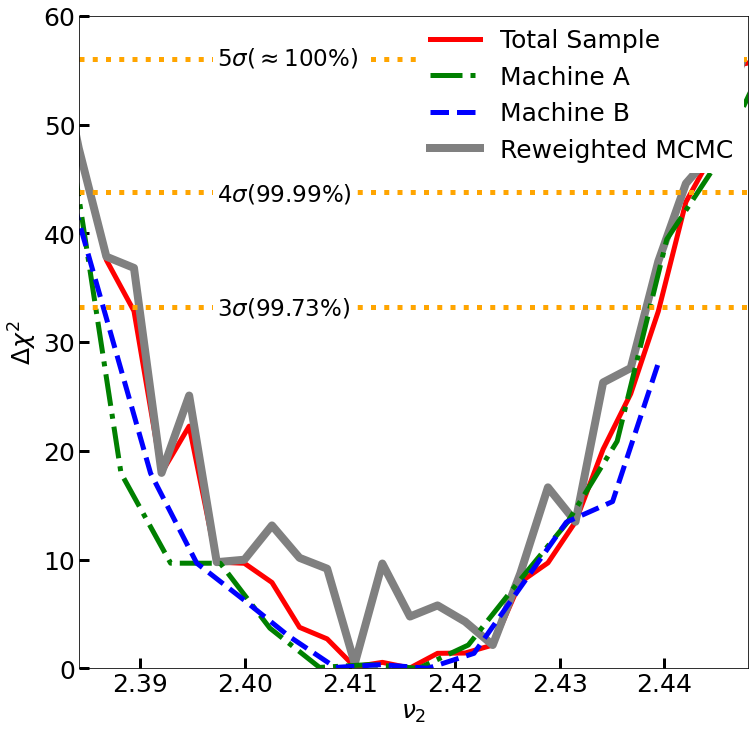

[37.39752 15.10975  2.58282  0.58277  0.       1.88909  2.14021  6.52137
 12.92114  8.70645 17.30754 26.30297 33.06386 42.46413 47.96194 51.35925
 65.84833]


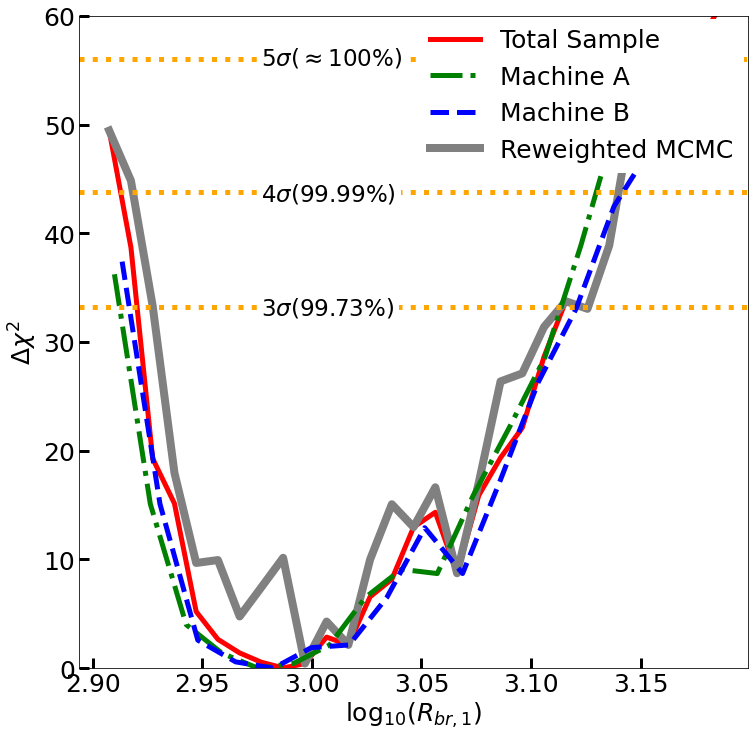

[50.91015 44.07805 21.43666  7.97739  3.4208   4.32394  0.08077  3.29274
  0.       3.15865  5.23652  2.14021  4.28051  8.68704 23.51293 33.33063
 46.73355]


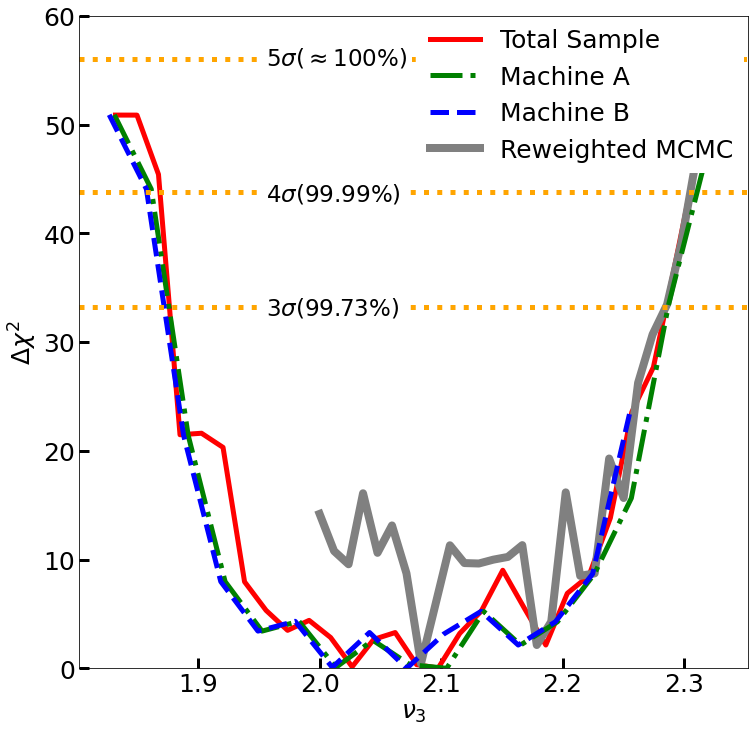

[51.05617 33.7133  27.69233 21.5096  13.72247  8.42426  2.14021  1.3753
  0.       0.33822  0.08077  3.4208   5.26101 10.31876 17.22798 36.02109
 45.33472]


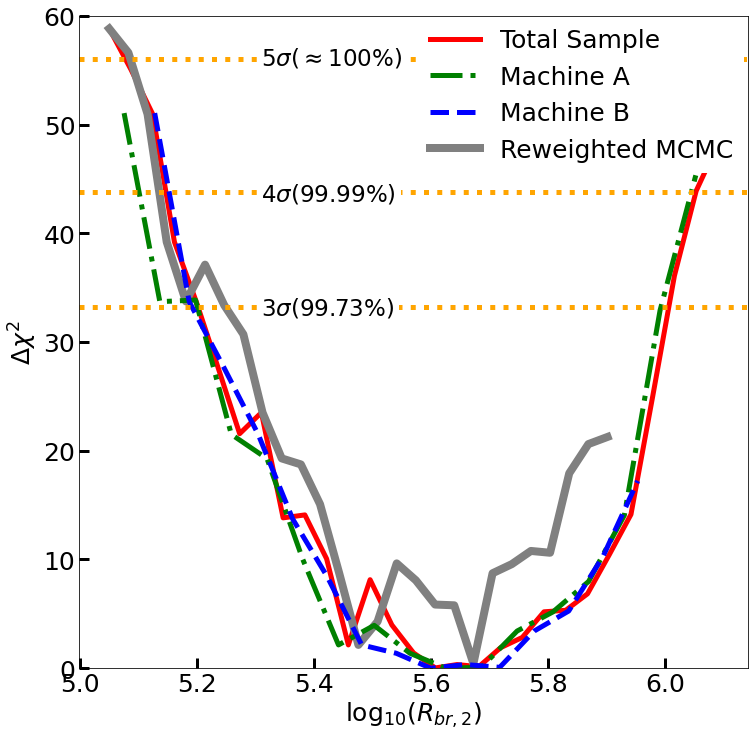

CPU times: user 5.66 s, sys: 1.96 s, total: 7.62 s
Wall time: 5.83 s


In [18]:
%%time
para_name  = [r"$D_0$ ($10^{28}$cm$^{2}$ s$^{-1})$", r"$\delta$", r"$Z_h$ $(kpc)$", r"$v_A$ (km s$^{-1}$)", 
              r"$\eta$", r"$\nu_1$", r"$\nu_2$", r"$\log_{10}(R_{br,1})$", r"$\nu_3$", r"$\log_{10}(R_{br,2})$"]
save_name = ["D0", "delta", "Zh", "vA","eta", "nu1", "nu2", "R1", "nu3", "R2"]


# thin_data = np.linspace(0,8200,1000,dtype="int")
# index_wo_noise = chi_index_wo_noise[thin_data]

para_6_sigma = para_6_sigma
chi_6_tmp = np.argsort(chi_6_sigma)
chi_6 = chi_6_sigma

para_6_sigma_0 = para_6_sigma_0
chi_6_tmp_0 = np.argsort(chi_6_sigma_0)
chi_6_0 = chi_6_sigma_0

for i in range(10):
    
#     if i != 2:
#         continue
        
    min_chi, min_chi_A, min_chi_B = [], [], []
    min_chi_0 = []
    ##################################################
#     """
#     Total Return (Machine A)
#     """
#     para_tmp = para_4_1[:15000]
#     chi_tmp = np.argsort(chi_4[:15000])
#     chi = chi_4[:15000]
#     if i >= 5 :
#         i = i + 1
        
#     """
#     Total Return (Machine B)
#     """
#     para_tmp = para_4_1[15000:]
#     chi_tmp = np.argsort(chi_4[15000:])
#     chi = chi_4[15000:]
#     if i >= 5 :
#         i = i + 1
    
    """
    Return in Pack (Machine A)
    """
    para_tmp_A = return_recovery_wo_noise
    chi_tmp_A = chi_index_wo_noise
    chi_A = chi_4[:15000][inpack_1][tmp_1]
    
    
    """
    Return in Pack (Machine B)
    """
    para_tmp_B = return_recovery_w_noise
    chi_tmp_B = chi_index_w_noise
    chi_B = chi_4[15000:][inpack_2][tmp_2]
    
    
    chi_tmp_A = chi_index_pseudo
    chi_tmp_B = chi_index_pseudo
    chi_A = chi_pseudo
    chi_B = chi_pseudo
    
    
#     print("####################")
    bin_size_A = np.linspace(min(para_tmp_A[:,i]), max(para_tmp_A[:,i]), 18)
    hist_A, binsize_A = np.histogram(para_tmp_A[:,i], bins=bin_size_A)
#     print("hist_A", hist_A)
#     print(bin_size_A)

    for j in range(len(bin_size_A)-1):
        if hist_A[j] <= 1:
            min_chi_A.append(0)  
        elif hist_A[j] > 1:
            min_chi_A.append(min(chi_A[chi_tmp_A][np.where((para_tmp_A[:,i][chi_tmp_A] >= bin_size_A[j]) & (para_tmp_A[:,i][chi_tmp_A] <= bin_size_A[j+1]))]))  
#     print(np.array(min_chi_A)-min(chi_pseudo))
    
#     print("####################")
    bin_size_B = np.linspace(min(para_tmp_B[:,i]), max(para_tmp_B[:,i]), 18)
    hist_B, binsize_B = np.histogram(para_tmp_B[:,i], bins=bin_size_B)
#     print("hist_B",hist_B)
#     print(bin_size_B)

    for j in range(len(bin_size_B)-1):
        min_chi_B.append(min(chi_B[chi_tmp_B][np.where((para_tmp_B[:,i][chi_tmp_B] >= bin_size_B[j]) & (para_tmp_B[:,i][chi_tmp_B] <= bin_size_B[j+1]))]))  
    print(np.array(min_chi_B)-min(chi_pseudo))

    k = i
    if i >= 5 :
        k += 1
    bin_size = np.linspace(min(para_6_sigma[:,k]), max(para_6_sigma[:,k]), 30)
    hist, binsize = np.histogram(para_6_sigma[:,k], bins=bin_size)
#     print(hist)
#     print("####################")
    for j in range(len(bin_size)-1):
        min_chi.append(min(chi_6[chi_6_tmp][np.where((para_6_sigma[:,k][chi_6_tmp] >= bin_size[j]) & (para_6_sigma[:,k][chi_6_tmp] <= bin_size[j+1]))]))  
    
    bin_size_0 = np.linspace(min(para_6_sigma_0[:,k]), max(para_6_sigma_0[:,k]), 30)
    hist_0, binsize_0 = np.histogram(para_6_sigma_0[:,k], bins=bin_size_0)
#     print(hist)
#     print("####################")
    for j in range(len(bin_size_0)-1):
        min_chi_0.append(min(chi_6_0[chi_6_tmp_0][np.where((para_6_sigma_0[:,k][chi_6_tmp_0] >= bin_size_0[j]) & (para_6_sigma_0[:,k][chi_6_tmp_0] <= bin_size_0[j+1]))]))  
    
    
    
    
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    
    p1, = ax.plot(bin_size[:-1], np.array(min_chi)-min(chi_pseudo), "-", color="red", linewidth=5, alpha=1, label="Total Sample")
    p4, = ax.plot(binsize_0[:-3], (np.array(min_chi_0)-min(chi_pseudo))[:-2], "-", color="gray", linewidth=8, alpha=1, label="Reweighted MCMC")
    p2, = ax.plot(binsize_A[:-1], np.array(min_chi_A)-min(chi_pseudo), "-.", color="green", linewidth=5, alpha=1, label="Machine A")
    p3, = ax.plot(binsize_B[:-3], (np.array(min_chi_B)-min(chi_pseudo))[:-2], "--", color="blue", linewidth=5, alpha=1, label="Machine B")
#     p4, = ax.plot(binsize_0[:-3], (np.array(min_chi_0)-min(chi_pseudo))[:-2], ":", color="purple", linewidth=5, alpha=1, label="MCMC")

    
    ax.set_ylabel("$\Delta \chi^2$", color="k", fontsize=25)
    ax.tick_params(axis='y', colors="k", length=10, width=3, labelsize=25, direction="in") 
    ax.set_ylim((0,60))
    
    ax.tick_params(axis='x', color="black", length=10, width=3, labelsize=25, direction="in")
    ax.set_xlabel(para_name[i], color="black", fontsize=25)

#     if i == 0 or i == 1 or i == 2 or i == 3 or i == 4 or i == 6 or i == 7 or i == 8 or i == 9 :
#         ax.axhline(y=56.04 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
#         ax.text(x=bin_size[10],y=55.5, s="$5\sigma$($\\approx 100\%$)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

#         ax.axhline(y=43.82 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
#         ax.text(x=bin_size[10],y=43, s="4$\sigma$(99.99%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

#         ax.axhline(y=33.20 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
#         ax.text(x=bin_size[10],y=32.5, s="3$\sigma$(99.73%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 
    
    
#     if i == 5:
#         ax.axhline(y=56.04 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
#         ax.text(x=bin_size[6],y=55.5, s="6$\sigma$($\\approx 100\%$)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

#         ax.axhline(y=43.82 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
#         ax.text(x=bin_size[6],y=43, s="4$\sigma$(99.99%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

#         ax.axhline(y=33.20 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
#         ax.text(x=bin_size[6],y=32.5, s="3$\sigma$(99.73%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 
   
    if i == 0 or i == 1 or i == 2 or i == 3 or i == 4 or i == 6 or i == 7 or i == 8 or i == 9 :
        ax.axhline(y=56.04 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[7],y=55.5, s="$5\sigma$($\\approx 100\%$)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

        ax.axhline(y=43.82 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[7],y=43, s="4$\sigma$(99.99%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

        ax.axhline(y=33.20 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[7],y=32.5, s="3$\sigma$(99.73%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 
    
    
    if i == 5:
        ax.axhline(y=56.04 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[6],y=55.5, s="6$\sigma$($\\approx 100\%$)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

        ax.axhline(y=43.82 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[6],y=43, s="4$\sigma$(99.99%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

        ax.axhline(y=33.20 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[6],y=32.5, s="3$\sigma$(99.73%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 
    
    
    lines = [p1, p2, p3, p4]
#     lines = [p4, p2, p3]
    ax.legend(lines, [l.get_label() for l in lines], loc="upper right", bbox_to_anchor=(1.011, 1.015), ncol=1, fontsize=25, edgecolor = "w",fancybox=False, framealpha=1)
#     ax.legend(lines, [l.get_label() for l in lines], loc="upper right", bbox_to_anchor=(0.7, 1.015), ncol=1, fontsize=25, edgecolor = "w",fancybox=False, framealpha=1)
    
#     plt.xlim(bin_size[2])
    
    
    if i == 2:
        plt.xlim(bin_size[2],18)
        
    if i == 6:
        plt.xlim(bin_size[2],2.448)
    
#     if i >= 5 :
#         i -= 1
    plt.savefig("./Figures/"+save_name[i]+"_4.pdf")
    plt.show()
    ##################################################